Data Loaded Successfully!
  Ticker        Date        Open        High         Low       Close  \
0   AAPL  2023-02-07  150.639999  155.229996  150.639999  154.649994   
1   AAPL  2023-02-08  153.880005  154.580002  151.169998  151.919998   
2   AAPL  2023-02-09  153.779999  154.330002  150.419998  150.869995   
3   AAPL  2023-02-10  149.460007  151.339996  149.220001  151.009995   
4   AAPL  2023-02-13  150.949997  154.259995  150.919998  153.850006   

    Adj Close    Volume  
0  154.414230  83322600  
1  151.688400  64120100  
2  150.639999  56007100  
3  151.009995  57450700  
4  153.850006  62199000  

Missing values:
 Ticker       0
Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


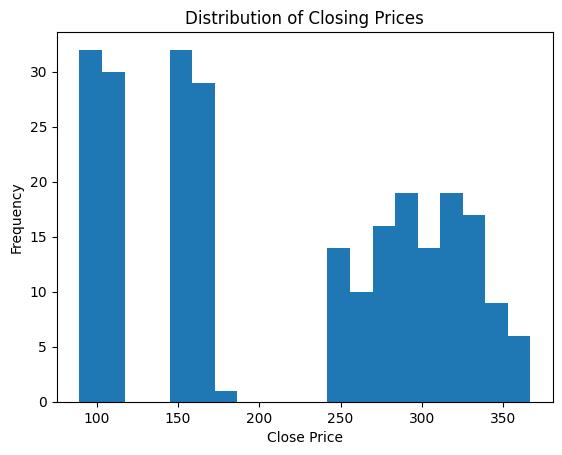

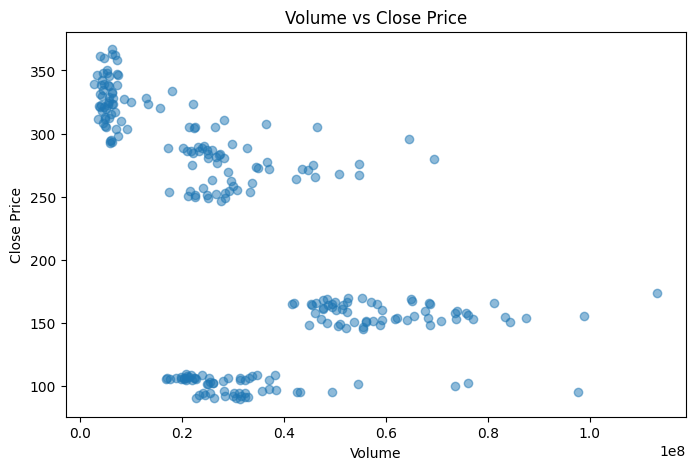

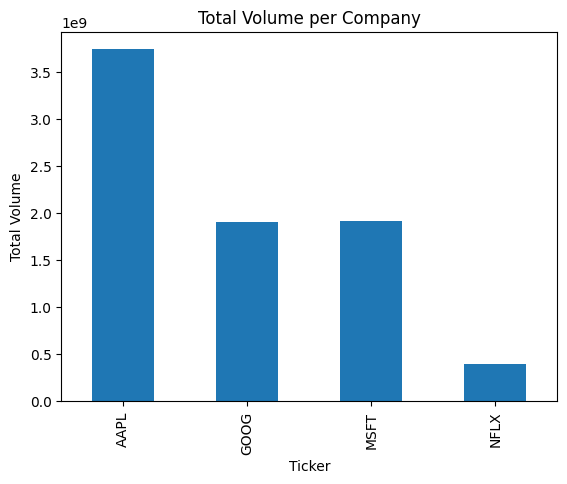


R² Score: 0.999339323531458
RMSE: 2.18965587715733


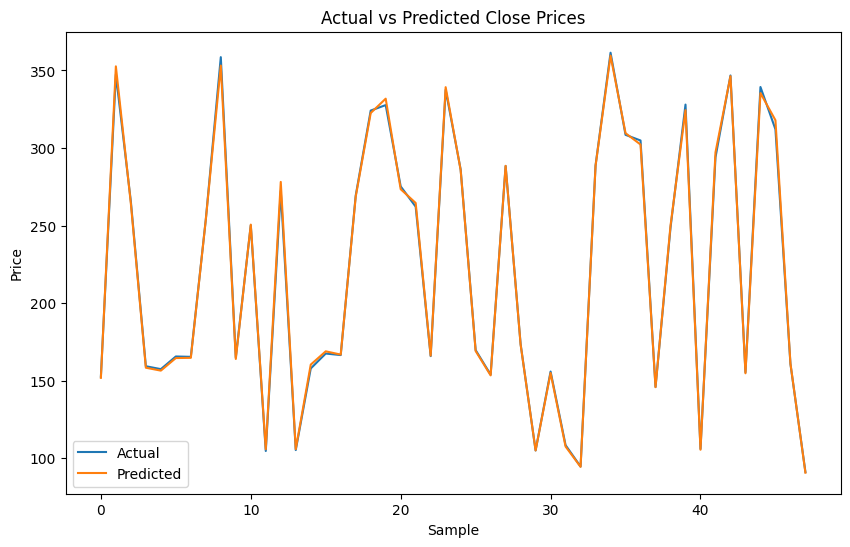

In [ ]:
#Stock Analysis Project
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

data = pd.read_csv("/content/sample_data/stocks.csv")
print("Data Loaded Successfully!")
print(data.head())

data['Date'] = pd.to_datetime(data['Date'])
print("\nMissing values:\n", data.isnull().sum())
data.dropna(inplace=True)

plt.hist(data['Close'], bins=20)
plt.title("Distribution of Closing Prices")
plt.xlabel("Close Price")
plt.ylabel("Frequency")
plt.show()

plt.figure(figsize=(8, 5))
plt.scatter(data['Volume'], data['Close'], alpha=0.5)
plt.title("Volume vs Close Price")
plt.xlabel("Volume")
plt.ylabel("Close Price")
plt.show()

volume_by_ticker = data.groupby("Ticker")["Volume"].sum()
volume_by_ticker.plot(kind="bar", title="Total Volume per Company")
plt.ylabel("Total Volume")
plt.show()

data = data.sort_values(by="Date")
data['MA5'] = data['Close'].rolling(window=5).mean()
data['MA10'] = data['Close'].rolling(window=10).mean()
data['Daily_Return'] = data['Close'].pct_change()

model_data = data.dropna()
X = model_data[['Open', 'High', 'Low', 'Volume']]
y = model_data['Close']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

print("\nR² Score:", r2_score(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label="Actual")
plt.plot(y_pred, label="Predicted")
plt.legend()
plt.title("Actual vs Predicted Close Prices")
plt.xlabel("Sample")
plt.ylabel("Price")
plt.show()
